In [1]:
import os

# 获取当前工作目录
current_dir = os.getcwd()
print("当前工作目录：", current_dir)
 
# 切换到上一层目录
parent_dir = os.path.dirname(current_dir)
os.chdir(parent_dir)
print("切换后的目录：", parent_dir)

当前工作目录： c:\Users\zhaoxs3\Downloads\NEMESIS\unit_test
切换后的目录： c:\Users\zhaoxs3\Downloads\NEMESIS


In [2]:
import QuantLib as ql
import pandas as pd

from devlib.market.curves.cme_term_sofr_curve import CmeTermSofr1M
from devlib.products.rates.irs.general_irs import *

In [3]:
from nemesis.products.rates import *

####################################################################
#  NEMESIS ALPHA Version 0.1.0 - This build: 24 Jan 2025 at 10:42 #
####################################################################



In [4]:
today = ql.Date(9, 7, 2024)
ql.Settings.instance().evaluationDate = today

mkt_file_path = './unit_test/data/tsfr1m_curve_data_20240709.xlsx'
deposit_mkt_data = pd.read_excel(mkt_file_path, sheet_name='deposit')
base_curve_swap_mkt_data = pd.read_excel(mkt_file_path, sheet_name='base_curve_swap')

tsfr1m_curve = CmeTermSofr1M(today, deposit_mkt_data=deposit_mkt_data,
                             base_curve_swap_mkt_data=base_curve_swap_mkt_data)

In [5]:
value_dt = Date(9,7,2024)
curve = OISCurve.build_curve_from_ql(value_dt, tsfr1m_curve, interp_type=InterpTypes.LINEAR_ZERO_RATES)

In [18]:
curve.dc_type = DayCountTypes.ACT_360

In [6]:
payment_dates = ql_date_to_date(tsfr1m_curve.curve.dates())[1:]

In [7]:
curve.print_table(payment_dt=payment_dates)

,Date,ZR,DF
0,2024-07-18,5.38925,0.998672
1,2024-07-25,5.38983,0.997640
2,2024-08-01,5.38985,0.996609
3,2024-08-12,5.38770,0.994994
4,2024-09-11,5.38803,0.990597
5,2024-10-11,5.34697,0.986324
6,2024-11-12,5.30941,0.981839
7,2024-12-11,5.27130,0.977864
8,2025-01-13,5.21752,0.973484
9,2025-02-11,5.16821,0.969741


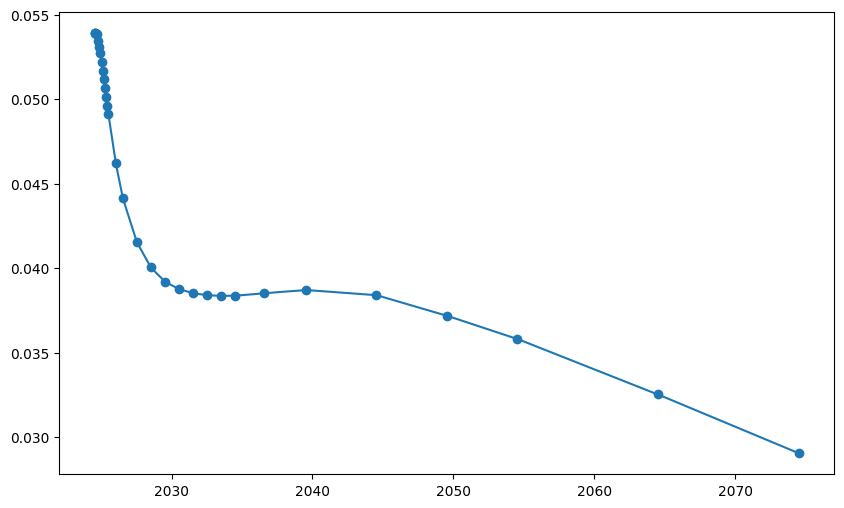

In [8]:
curve.print_figure(payment_dates)

In [24]:
fixed_type = SwapTypes.RECEIVE
fixed_freq = FrequencyTypes.MONTHLY
fixed_dc_type = DayCountTypes.ACT_360

swap = OIS(
    effective_dt=Date(26,7,2024),
    term_dt_or_tenor="3Y",
    fixed_leg_type=fixed_type,
    fixed_cpn=0.05,
    fixed_freq_type=fixed_freq,
    fixed_dc_type=fixed_dc_type,
    notional=1e7,
    payment_lag=2,
    float_multiplier=1,
    float_spread=0,
    float_compounding_type='ExcludeSprd',
    float_freq_type=FrequencyTypes.MONTHLY,
    float_dc_type=DayCountTypes.ACT_360,
    cal_type=CalendarTypes.UNITED_STATES,
    bd_type=BusDayAdjustTypes.MODIFIED_FOLLOWING,
    dg_type=DateGenRuleTypes.FORWARD,
    reset_freq='None',
    fixing_days=2,
    end_of_month= False,
    is_ois_leg=False,
)

In [25]:
swap.value(value_dt=value_dt, ois_curve=curve)

np.float64(255001.81145219225)

In [12]:
swap.fixed_leg.value(value_dt, curve)

np.float64(494526.01582892885)

In [13]:
swap.float_leg.value(value_dt, curve, curve)

np.float64(-475534.2042237501)

In [14]:
swap.float_leg.payments

[np.float64(45855.47448747062),
 np.float64(45422.15163670926),
 np.float64(45931.50567497206),
 np.float64(40998.41038834207),
 np.float64(41517.066290090996),
 np.float64(43151.698402001944),
 np.float64(39525.24087002511),
 np.float64(36039.90116938682),
 np.float64(41464.324600328786),
 np.float64(35685.35533811572),
 np.float64(36130.13535963406),
 np.float64(37924.547495233885)]

In [15]:
swap.float_leg.payment_dts

[28-AUG-2024,
 30-SEP-2024,
 30-OCT-2024,
 29-NOV-2024,
 30-DEC-2024,
 29-JAN-2025,
 28-FEB-2025,
 28-MAR-2025,
 30-APR-2025,
 29-MAY-2025,
 30-JUN-2025,
 30-JUL-2025]

In [16]:
swap.float_leg.payments

[np.float64(45855.47448747062),
 np.float64(45422.15163670926),
 np.float64(45931.50567497206),
 np.float64(40998.41038834207),
 np.float64(41517.066290090996),
 np.float64(43151.698402001944),
 np.float64(39525.24087002511),
 np.float64(36039.90116938682),
 np.float64(41464.324600328786),
 np.float64(35685.35533811572),
 np.float64(36130.13535963406),
 np.float64(37924.547495233885)]